In [1]:
import random
import numpy as np

from utils_to_study_an_instance import build_instance_graph, find_intersections_lists

def compute_mean_valency(subsets, verbose=False):
    """
    Parameters
    ----------
        subsets (list of sets)
    
    Return
    ------
        mean_valency (float)
    """
    
    ### Find the list of intersections
    # For every subset, find the subsets it has a non-zero intersection with
    list_of_intersections = find_intersections_lists(subsets)
    
    ### Find the valencies for each subset (i.e., the number of subsets it intersects with)
    valencies = [len(x) for x in list_of_intersections]
    mean_valency = np.mean(valencies)
    if verbose:
        print("valencies: ", valencies)
        print("mean_valency: ", mean_valency)
    
    return mean_valency


mean_valency = 1.3333333333333333


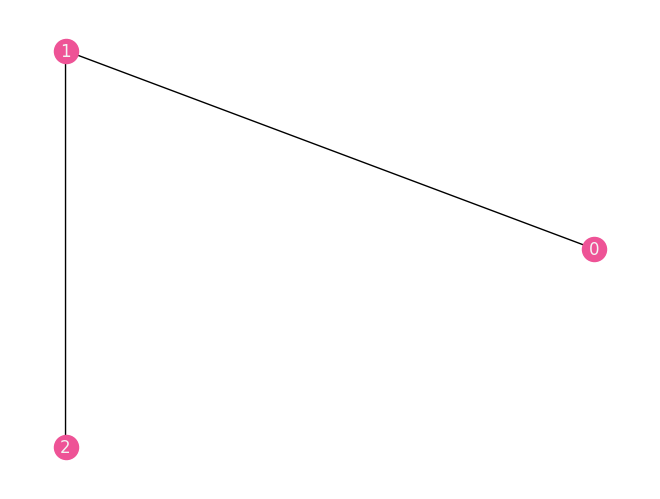

In [2]:
subsets = [{1}, {1,2}, {2}]
build_instance_graph(subsets, verbose=False, draw_graph=True)
mean_valency = compute_mean_valency(subsets)
print(f"mean_valency = {mean_valency}")


In [3]:
import copy

U = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
n = 6
max_length = 10
mec_length = 2
subsets = []

### Generate the MEC with 2 subsets.

# Random set with between 2 and 11 elements
subsets.append(set(random.sample(U, random.randint(2, max_length))))

# The complementary set.
subsets.append(U - subsets[0])

mec = [subsets[0] , U - subsets[0]]
print("mec:", mec)

# Generate the other subsets.
not_mec = []
for _ in range(n - mec_length):
    random_single_set = set([random.randint(1,12)])
    not_mec.append(random_single_set)
print("not mec", not_mec)


ITERATION = 0

while ITERATION < 50:
    ITERATION += 1
    
    # Shuffle the "not_mec" part of subsets,
    subsets = mec + random.sample(not_mec, len(not_mec))
    
    subsets_tmp = copy.deepcopy(subsets)
    for subset in subsets_tmp[2::]:
        subset.add(random.randint(1,12))

        mean_valency = compute_mean_valency(subsets_tmp)
        # print("mean_valency: ", mean_valency)
        
        check = np.all([len(s) < max_length for s in subsets_tmp])
        # print("check", check)
        if (1 < mean_valency < 5) and check:
            subsets = subsets_tmp
            continue
        else:
            print("fail")
            ITERATION = 0
            break

print("subsets:", subsets)
print("mean_valency: ", mean_valency)

mec: [{8, 9, 10, 6}, {1, 2, 3, 4, 5, 7, 11, 12}]
not mec [{5}, {2}, {7}, {8}]
subsets: [{8, 9, 10, 6}, {1, 2, 3, 4, 5, 7, 11, 12}, {5}, {9, 2}, {8, 2}, {12, 7}]
mean_valency:  2.3333333333333335
